<a href="https://colab.research.google.com/github/Rishi-Upadhyay-2008/Portfolio-Forward-Testing/blob/main/Portfolio_Forward_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portfolio variance : 0.00032 %
Covariance: Ticker      AAPL       GLD      NVDA      PLTR
Ticker                                        
AAPL    0.000313  0.000001  0.000193  0.000203
GLD     0.000001  0.000169  0.000023  0.000037
NVDA    0.000193  0.000023  0.001035  0.000572
PLTR    0.000203  0.000037  0.000572  0.001576
Portofolio returns: 0.24 %
Final Capital: £ 3016.34
Portfolio Volatitlity : 1.794 %


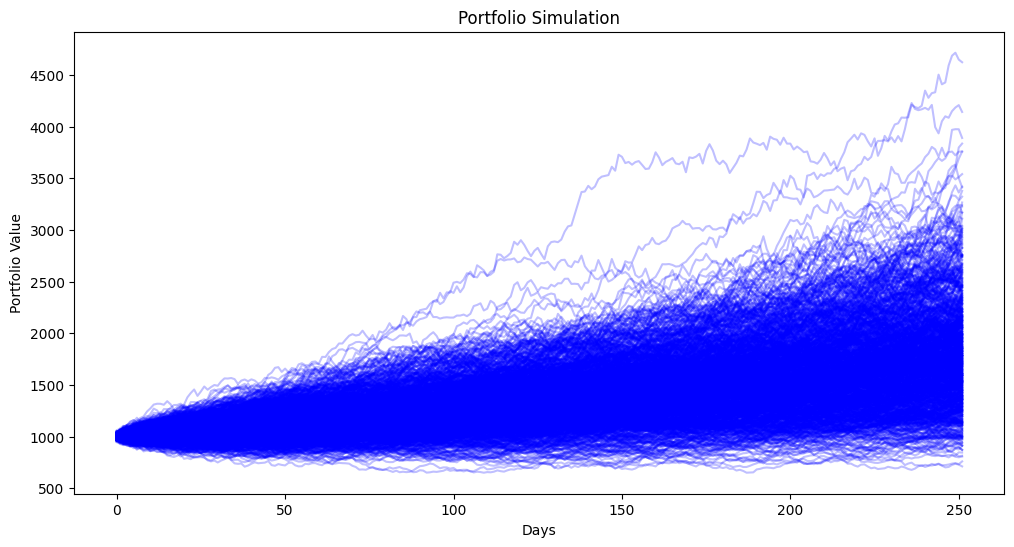

win rate: 97.1 %
Profit : £ 1809.0
Standard Deviation :£ 525.8


In [221]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt



#METRICS USED TO WEIGH THE PORTFOLIO AND TOTAL CAPITAL OF PORTFOLIO
stocks =['GLD','AAPL','NVDA','PLTR']
weight = [0.25,0.25,0.25,0.25]
capital =1000
t = yf.download(stocks,auto_adjust= True ,group_by = 'column',progress= False, period='2y')

#the data needed to calculate the portfolios outcomes
close_price = t['Close']
returns = close_price.pct_change().dropna()

#The way the assets move
covariance = returns.cov()
variance = returns.var()

#Daily returns of portfolio
portfolio_returns_per_day = (returns*weight).sum(axis=1)

#Volatility of portfolio
portfolio_volatility = np.sqrt(np.dot(weight,np.dot(covariance,weight)))

#The compounding of the inital capital
final_capital = capital*(1+portfolio_returns_per_day).cumprod().iloc[-1]

#Variance of portfolio
portfolio_variance = np.dot(np.array(weight),np.dot(covariance,np.array(weight)))


#REPRESENTING THE CURRENT FORECAST

print("Portfolio variance :",round(portfolio_variance,5),'%')
print('Covariance:',covariance)
print('Portofolio returns:',round(sum(portfolio_returns_per_day,)/504,4)*100,'%')
print("Final Capital: £",round(final_capital,2))
print("Portfolio Volatitlity :",round(portfolio_volatility,5)*100,'%')


#Future iteration of the Portfolio

#PARAMETERS WHICH AFFECT THE FUTURE PRICE ACTION

mean_returns = returns.mean()
cov_matrix = returns.cov()
days = 252
num_simulation = 1000
random_daily_returns = np.random.multivariate_normal(mean_returns,cov_matrix,size=days)


#SIMULATING FUTURE PRICE ACTIONS

def sim_portfolio(initial_capital,days,weight,cov_matrix,num_simulation,mean_returns):
  final = []
  all_paths = []
  for i in range(num_simulation):
      random_daily_returns = np.random.multivariate_normal(mean_returns,cov_matrix,size=days)
      portfolio_returns = random_daily_returns @ weight
      portfolio_path = initial_capital * np.cumprod(1+portfolio_returns)
      final_capital = portfolio_path[-1]
      final.append(final_capital)
      all_paths.append(portfolio_path)
  return np.array(final),np.array(all_paths)

#TESTING THE PORTFOLIO

final,all_paths = sim_portfolio(
    initial_capital=capital,
    days=days,
    weight=weight,
    cov_matrix=cov_matrix,
    num_simulation=num_simulation,
    mean_returns=mean_returns
)

#CALCUATING WINRATE

wins = final>capital
winrate = (wins.sum()/num_simulation)*100


#PLOTTING THE DATA

plt.figure(figsize=(12,6))
for path in all_paths :
    plt.plot(path,color='blue',alpha=0.25)
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Simulation')
plt.show()

#METRICS

final_mean = np.mean(final)
final_std = np.std(final)

print('win rate:',winrate,'%')
print('Profit : £',round(final_mean,2))
print('Standard Deviation :£',round(final_std,2))